In [1]:
import pandas as pd
import numpy as np
import numpy as np
import scipy.stats as sm
import pylab as py
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Superstore%20Dataset/Sample%20-%20Superstore.csv",error_bad_lines=False, encoding='cp1252')
df

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [3]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [4]:
trace = go.Histogram(x=df.Sales, xbins=dict(start=np.min(df.Sales), size=100, end=np.max(df.Sales)),
                   marker=dict(color='rgb(0, 0, 100)'))

layout = go.Layout(
    title="Sales distribution!"
)

fig = go.Figure(data=go.Data([trace]), layout=layout)
fig.show()

/opt/conda/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:40: DeprecationWarning: plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.

  DeprecationWarning,


In [5]:
trace = go.Histogram(x=df.Discount, xbins=dict(start=np.min(df.Discount), size=0.05, end=np.max(df.Discount)),
                   marker=dict(color='rgb(100, 0, 100)'))

layout = go.Layout(
    title="Discounts distribution!"
)

fig = go.Figure(data=go.Data([trace]), layout=layout)
fig.show()

/opt/conda/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




Is profit distribution normal?


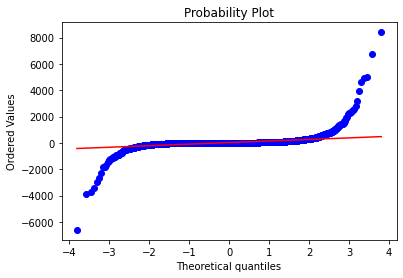

In [6]:
trace = go.Histogram(x=df.Profit, xbins=dict(start=np.min(df.Profit), size=100, end=np.max(df.Profit)),
                   marker=dict(color='rgb(100, 0, 90)'))

layout = go.Layout(
    title="Profit distribution!"
)

fig = go.Figure(data=go.Data([trace]), layout=layout)
fig.show()
print("Is profit distribution normal?")
sm.probplot(df.Profit, dist="norm", plot=py)
py.show()

In [7]:
trace = go.Histogram(x=df.Quantity, xbins=dict(start=np.min(df.Quantity), size=1, end=np.max(df.Quantity)),
                   marker=dict(color='rgb(110, 0, 50)'))

layout = go.Layout(
    title="Quantity distribution!"
)

fig = go.Figure(data=go.Data([trace]), layout=layout)
fig.show()

/opt/conda/lib/python3.7/site-packages/plotly/graph_objs/_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [8]:
def ones(x):
    return 1
df['Row ID'] = df['Row ID'].apply(ones)
fig = px.sunburst(data_frame = df[['Category','Sub-Category','Row ID']].groupby(['Category','Sub-Category']).sum().reset_index(), path=['Category', 'Sub-Category'], values='Row ID', title='Frequency of category occurences.',color_discrete_sequence=px.colors.sequential.Electric)
fig.show()

In [9]:
fig = px.sunburst(data_frame = df[['Region','City','Row ID']].groupby(['Region','City']).sum().reset_index(), path=['Region', 'City'], values='Row ID', title='Frequency of regions and cities occurences.',color_discrete_sequence=px.colors.sequential.Mint)
fig.show()

In [10]:
print("Total count of products: ",len(list(df['Product Name'].unique())))
top_prod = df.groupby('Product Name').size().reset_index().rename(columns={0: 'total'}).sort_values('total', ascending=False).head(5)
fig = px.pie(top_prod, values='total', names='Product Name', color_discrete_sequence=px.colors.sequential.Hot, title='Top 5 products.')
fig.show()
top_prod = df.groupby('Product Name').size().reset_index().rename(columns={0: 'total'}).sort_values('total', ascending=False).head(10)
fig = px.pie(top_prod, values='total', names='Product Name', color_discrete_sequence=px.colors.sequential.Hot, title='Top 10 products.')
fig.show()
top_prod = df.groupby('Product Name').size().reset_index().rename(columns={0: 'total'}).sort_values('total', ascending=False).head(20)
fig = px.pie(top_prod, values='total', names='Product Name', color_discrete_sequence=px.colors.sequential.Hot, title='Top 20 products.')
fig.show()

Total count of products:  1850


In [11]:
fig = px.sunburst(data_frame = df[['Category','Product Name','Row ID']].groupby(['Category','Product Name']).sum().reset_index().sort_values('Row ID',ascending=False).head(50), path=['Category', 'Product Name'], values='Row ID', title='Top 50 products and their distribution acorss categories',color_discrete_sequence=px.colors.sequential.Agsunset)
fig.show()

In [12]:
segment = df.groupby('Segment').size().reset_index().rename(columns={0: 'total'})
fig = px.pie(segment, values='total', names='Segment', color_discrete_sequence=px.colors.sequential.Cividis, title='Segments frequency')
fig.show()

In [13]:
trace = go.Histogram(x=df[df.Category=='Technology'].Profit, xbins=dict(start=np.min(df.Profit), size=100, end=np.max(df.Profit)),
                   marker=dict(color='rgb(100, 0, 90)'),name='Technology')

trace2  = go.Histogram(x=df[df.Category=='Furniture'].Profit, xbins=dict(start=np.min(df.Profit), size=100, end=np.max(df.Profit)),
                   marker=dict(color='rgb(225, 0, 0)'),name='Furniture')
trace3 = go.Histogram(x=df[df.Category=='Office Supplies'].Profit, xbins=dict(start=np.min(df.Profit), size=100, end=np.max(df.Profit)),
                   marker=dict(color='rgb(255, 255, 0)'),name='Office Supplies')




layout = go.Layout(
    title="Profit by category"
)
fig = go.Figure(data=go.Data([trace,trace2,trace3]), layout=layout)
fig.show()
print('Technology products mean profit',df[df.Category=='Technology'].Profit.mean(),'Technology products profit std', df[df.Category=='Technology'].Profit.std(),'Technology products profit median', df[df.Category=='Technology'].Profit.median())
print('Furniture products mean profit',df[df.Category=='Furniture'].Profit.mean(),'Furniture products profit std', df[df.Category=='Furniture'].Profit.std(),'Furniture products profit median', df[df.Category=='Furniture'].Profit.median())
print('Office Supplies products mean profit',df[df.Category=='Office Supplies'].Profit.mean(),'Office Supplies products profit std', df[(df.Category=='Office supplies')].dropna().Profit.std(),'Office Supplies products profit median', df[(df.Category=='Office supplies')].dropna().Profit.median())

Technology products mean profit 78.75200221981586 Technology products profit std 428.81663300517454 Technology products profit median 25.0182
Furniture products mean profit 8.699327109853842 Furniture products profit std 136.04924643905227 Furniture products profit median 7.7748
Office Supplies products mean profit 20.327049585131117 Office Supplies products profit std nan Office Supplies products profit median nan


In [14]:
trace = go.Histogram(x=df[df.Category=='Technology'].Sales, xbins=dict(start=np.min(df.Sales), size=100, end=np.max(df.Sales)),
                   marker=dict(color='rgb(100, 0, 90)'),name='Technology')

trace2  = go.Histogram(x=df[df.Category=='Furniture'].Sales, xbins=dict(start=np.min(df.Sales), size=100, end=np.max(df.Sales)),
                   marker=dict(color='rgb(225, 0, 0)'),name='Furniture')
trace3 = go.Histogram(x=df[df.Category=='Office Supplies'].Sales, xbins=dict(start=np.min(df.Sales), size=100, end=np.max(df.Sales)),
                   marker=dict(color='rgb(255, 255, 0)'),name='Office Supplies')




layout = go.Layout(
    title="Sales by category"
)
fig = go.Figure(data=go.Data([trace,trace2,trace3]), layout=layout)
fig.show()
print('Technology products mean sales',df[df.Category=='Technology'].Sales.mean(),'Technology products sales std', df[df.Category=='Technology'].Sales.std(),'Technology products sales median', df[df.Category=='Technology'].Sales.median())
print('Furniture products mean sales',df[df.Category=='Furniture'].Sales.mean(),'Furniture products sales std', df[df.Category=='Furniture'].Sales.std(),'Furniture products sales median', df[df.Category=='Furniture'].Sales.median())
print('Office Supplies products mean sales',df[df.Category=='Office Supplies'].Sales.mean(),'Office Supplies products sales std', df[(df.Category=='Office supplies')].Sales.std(),'Office Supplies products sales median', df[(df.Category=='Office supplies')].Sales.median())

Technology products mean sales 452.70927612344155 Technology products sales std 1108.6558482022638 Technology products sales median 166.16
Furniture products mean sales 349.83488698727007 Furniture products sales std 503.1791448146307 Furniture products sales median 182.22
Office Supplies products mean sales 119.32410089611732 Office Supplies products sales std nan Office Supplies products sales median nan
